In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import metrics

### 1. Read the data and print the data

In [2]:
data = pd.read_csv('Cancertreatmentdataset.csv', skiprows=3)
print("Data :\n", data)

Data :
      Cancer Site  Year         Sex       Age  \
0       AllSites  2010  Both sexes  All ages   
1       AllSites  2010  Both sexes  All ages   
2       AllSites  2010  Both sexes  All ages   
3       AllSites  2010  Both sexes  All ages   
4       AllSites  2010  Both sexes  All ages   
...          ...   ...         ...       ...   
1249       Other  2020  Both sexes  All ages   
1250       Other  2020  Both sexes  All ages   
1251       Other  2020  Both sexes  All ages   
1252       Other  2020  Both sexes  All ages   
1253       Other  2020  Both sexes  All ages   

                     Incidence and Survival Assumptions  \
0                  Incidence, Survival at constant rate   
1     Incidence follows recent trend, Survival constant   
2     Survival follows recent trend, Incidence constant   
3              Incidence, Survival follow recent trends   
4              Incidence, Survival follow recent trends   
...                                                 ...   
12

### 2. Display the head of data

In [3]:
print(data.head())

  Cancer Site  Year         Sex       Age  \
0    AllSites  2010  Both sexes  All ages   
1    AllSites  2010  Both sexes  All ages   
2    AllSites  2010  Both sexes  All ages   
3    AllSites  2010  Both sexes  All ages   
4    AllSites  2010  Both sexes  All ages   

                  Incidence and Survival Assumptions  \
0               Incidence, Survival at constant rate   
1  Incidence follows recent trend, Survival constant   
2  Survival follows recent trend, Incidence constant   
3           Incidence, Survival follow recent trends   
4           Incidence, Survival follow recent trends   

  Annual Cost Increase (applied to initial and last phases)  Total Costs  \
0                                                 0%            124565.6   
1                                                 0%            122420.8   
2                                                 0%            125397.7   
3                                                 0%            123236.3   
4           

### 3. Display the tail of data

In [4]:
print(data.tail())

     Cancer Site  Year         Sex       Age  \
1249       Other  2020  Both sexes  All ages   
1250       Other  2020  Both sexes  All ages   
1251       Other  2020  Both sexes  All ages   
1252       Other  2020  Both sexes  All ages   
1253       Other  2020  Both sexes  All ages   

                     Incidence and Survival Assumptions  \
1249  Incidence follows recent trend, Survival constant   
1250  Survival follows recent trend, Incidence constant   
1251           Incidence, Survival follow recent trends   
1252           Incidence, Survival follow recent trends   
1253           Incidence, Survival follow recent trends   

     Annual Cost Increase (applied to initial and last phases)  Total Costs  \
1249                                                 0%             26945.7   
1250                                                 0%             29975.9   
1251                                                 0%             30892.3   
1252                                    

### 4. Checking for null values and  duplicate values

In [5]:
print("Null Values : \n",data.isnull().sum())

Null Values : 
 Cancer Site                                                  0
Year                                                         0
Sex                                                          0
Age                                                          0
Incidence and Survival Assumptions                           0
Annual Cost Increase (applied to initial and last phases)    0
Total Costs                                                  0
Initial Year After Diagnosis Cost                            0
Continuing Phase Cost                                        0
Last Year of Life Cost                                       0
dtype: int64


In [6]:
print("Duplicate Values for each column : \n")
for col in data.columns:
    print(col, "-", data[col].is_unique)

Duplicate Values for each column : 

Cancer Site - False
Year - False
Sex - False
Age - False
Incidence and Survival Assumptions - False
Annual Cost Increase (applied to initial and last phases) - False
Total Costs - False
Initial Year After Diagnosis Cost - False
Continuing Phase Cost - False
Last Year of Life Cost - False


### 5. Display Gender-wise total costs

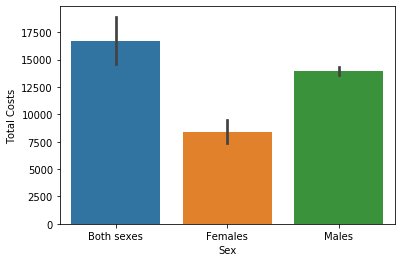

In [7]:
sns.barplot(x="Sex", y="Total Costs", data=data)

### 6. Display Gender-wise Annual cost increase

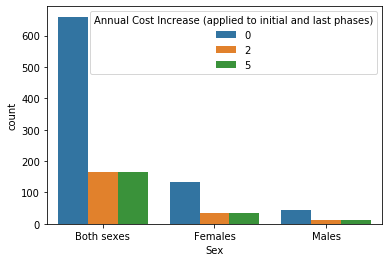

In [8]:
annual_cost = []
data_copy = data.copy()
for i, elem in enumerate(data_copy['Annual Cost Increase (applied to initial and last phases)']):
     annual_cost.append(int(elem.split('%')[0]))
    
data_copy['Annual Cost Increase (applied to initial and last phases)'] = annual_cost
sns.countplot(x="Sex", hue="Annual Cost Increase (applied to initial and last phases)", data=data_copy)

### 7. Apply best suitable ML algorithm that you may know to predict the total cost in future

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 10 columns):
Cancer Site                                                  1254 non-null object
Year                                                         1254 non-null int64
Sex                                                          1254 non-null object
Age                                                          1254 non-null object
Incidence and Survival Assumptions                           1254 non-null object
Annual Cost Increase (applied to initial and last phases)    1254 non-null object
Total Costs                                                  1254 non-null float64
Initial Year After Diagnosis Cost                            1254 non-null float64
Continuing Phase Cost                                        1254 non-null float64
Last Year of Life Cost                                       1254 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 98.1+ KB


In [10]:
data.head()

,Cancer Site,Year,Sex,Age,Incidence and Survival Assumptions,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost
0,AllSites,2010,Both sexes,All ages,"Incidence, Survival at constant rate",0%,124565.6,40463.5,46642.8,37459.2
1,AllSites,2010,Both sexes,All ages,"Incidence follows recent trend, Survival constant",0%,122420.8,38552.7,46671.9,37196.3
2,AllSites,2010,Both sexes,All ages,"Survival follows recent trend, Incidence constant",0%,125397.7,40463.5,47136.3,37797.9
3,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",0%,123236.3,38552.7,47155.7,37527.8
4,AllSites,2010,Both sexes,All ages,"Incidence, Survival follow recent trends",2%,123236.3,38552.7,47155.7,37527.8


In [11]:
categorical = ['Cancer Site', 'Sex', 'Age', 'Incidence and Survival Assumptions']

In [12]:
from sklearn import preprocessing

for col in data.columns:
    if col in categorical:
        dummy = pd.get_dummies(data[[col]])
        data = pd.concat([data, dummy], axis=1)
        
        data = data.drop([col], axis=1)

In [13]:
annual_cost = []
for i, elem in enumerate(data['Annual Cost Increase (applied to initial and last phases)']):
     annual_cost.append(int(elem.split('%')[0]))
    
data['Annual Cost Increase (applied to initial and last phases)'] = annual_cost

Corr Shape :  (33, 33)


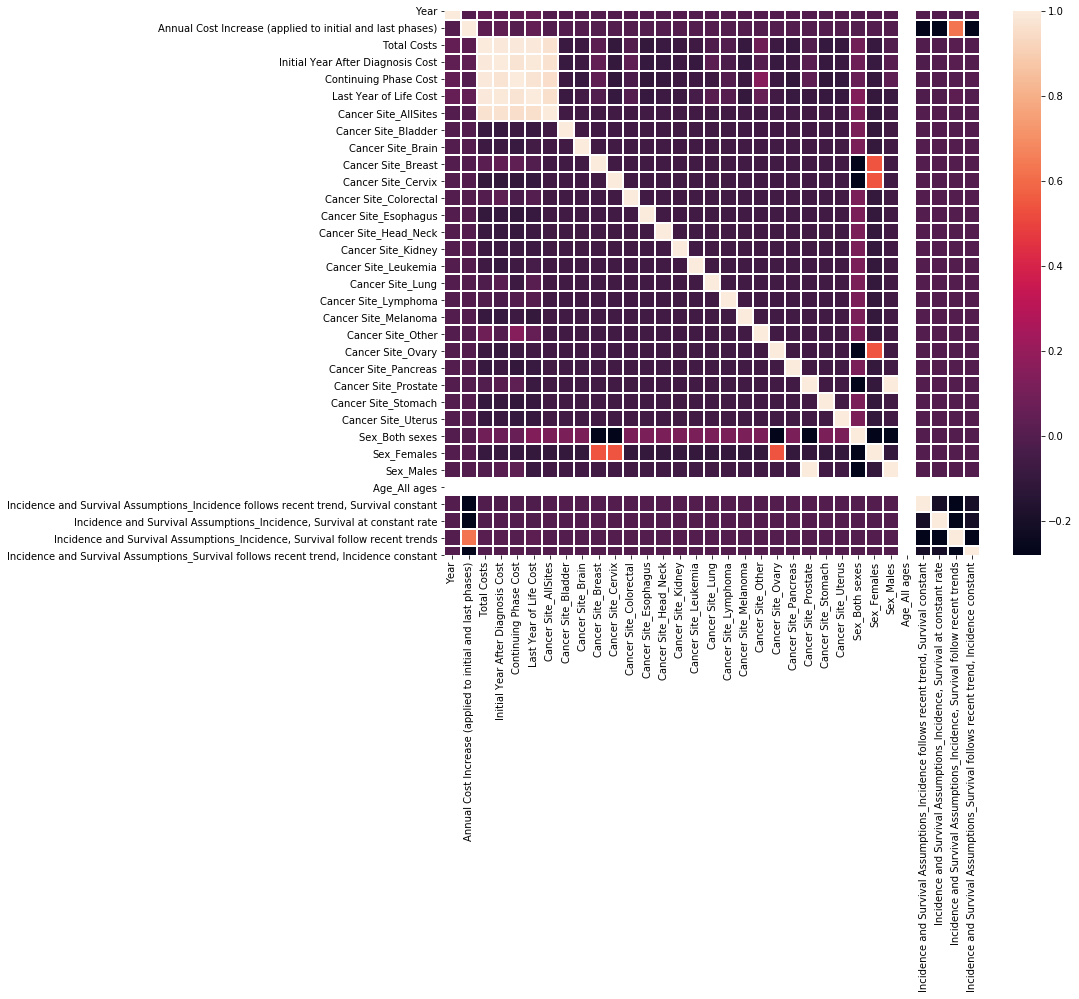

In [14]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False,linewidths=1,robust=True)
print("Corr Shape : ",corr.shape)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 33 columns):
Year                                                                                    1254 non-null int64
Annual Cost Increase (applied to initial and last phases)                               1254 non-null int64
Total Costs                                                                             1254 non-null float64
Initial Year After Diagnosis Cost                                                       1254 non-null float64
Continuing Phase Cost                                                                   1254 non-null float64
Last Year of Life Cost                                                                  1254 non-null float64
Cancer Site_AllSites                                                                    1254 non-null uint8
Cancer Site_Bladder                                                                     1254 non-null uint8
Cancer Site_Brain    

In [16]:
data.head()

,Year,Annual Cost Increase (applied to initial and last phases),Total Costs,Initial Year After Diagnosis Cost,Continuing Phase Cost,Last Year of Life Cost,Cancer Site_AllSites,Cancer Site_Bladder,Cancer Site_Brain,Cancer Site_Breast,...,Cancer Site_Stomach,Cancer Site_Uterus,Sex_Both sexes,Sex_Females,Sex_Males,Age_All ages,"Incidence and Survival Assumptions_Incidence follows recent trend, Survival constant","Incidence and Survival Assumptions_Incidence, Survival at constant rate","Incidence and Survival Assumptions_Incidence, Survival follow recent trends","Incidence and Survival Assumptions_Survival follows recent trend, Incidence constant"
0,2010,0,124565.6,40463.5,46642.8,37459.2,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,2010,0,122420.8,38552.7,46671.9,37196.3,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,2010,0,125397.7,40463.5,47136.3,37797.9,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2010,0,123236.3,38552.7,47155.7,37527.8,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2010,2,123236.3,38552.7,47155.7,37527.8,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

# Splitting Data into X and Y arrays
X = np.array(data.drop(["Total Costs"], 1))
y = np.array(data["Total Costs"])

# Splitting the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Fitting the data to Linear Regression Model using LinearRegression()
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Predicting the sales for test data

y_pred = lr_model.predict(X_test)
print('Accuracy of linear regression on test set: {}'.format(lr_model.score(X_test, y_test)))

Accuracy of linear regression on test set: 0.999999999995331


In [20]:
# Checking the RMSE Error
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE) :  0.059427046294471986


### Perform Cross Validation and obtain accuracy error

In [21]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [22]:
from sklearn.svm import SVR

In [23]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lr_model.fit(X_train, y_train)
    scores.append(lr_model.score(X_test, y_test))

Train Index:  [ 126  127  128 ... 1251 1252 1253] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
Train Index:  [   0    1    2 ... 1251 1252 1253] 

Test Index:  [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

In [24]:
scores

[0.9999999999976217,
 0.999999999995513,
 0.9999999999955244,
 0.9999999999959109,
 0.9999999999955977,
 0.9999999999961331,
 0.9999999999967175,
 0.9999999999968042,
 0.9999999999968656,
 0.9999999999975534]

In [25]:
print(np.mean(scores))

0.9999999999964244


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_model, X, y, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])